<a href="https://colab.research.google.com/github/manas16may/Bayesian-MCMC/blob/main/Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pymc3==3.8

     |████████████████████████████████| 911kB 5.6MB/s 
     |████████████████████████████████| 1.6MB 39.1MB/s 
     |████████████████████████████████| 737kB 41.8MB/s 
     |████████████████████████████████| 4.7MB 34.7MB/s 
     |████████████████████████████████| 317kB 53.0MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [4]:
pip install arviz

In [5]:
import numpy as np
import pymc3 as pm
import arviz as az

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 2 divergences: 100%|██████████| 3000/3000 [00:03<00:00, 806.14it/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 3000/3000 [00:12<00:00, 245.33it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 3000/3000 [00:32<00:00, 92.45it/s]


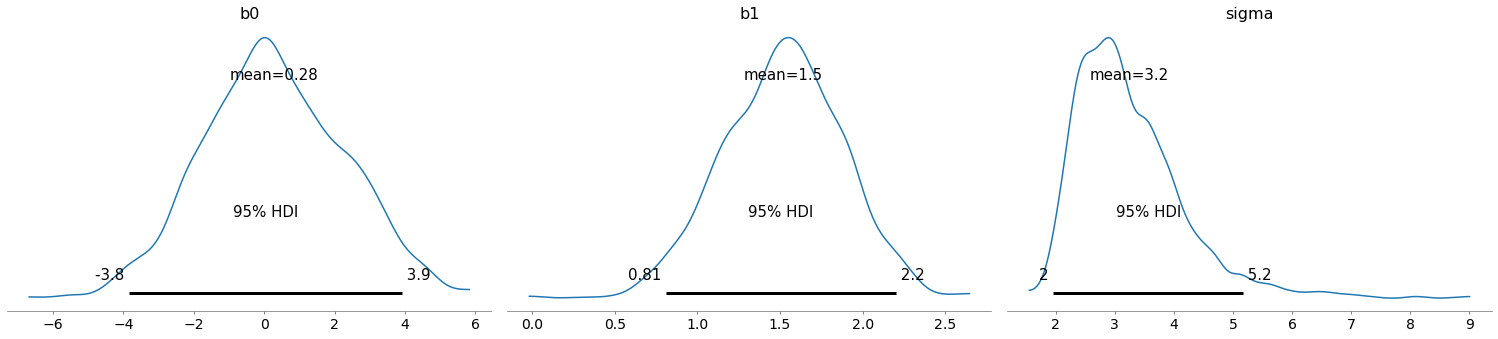

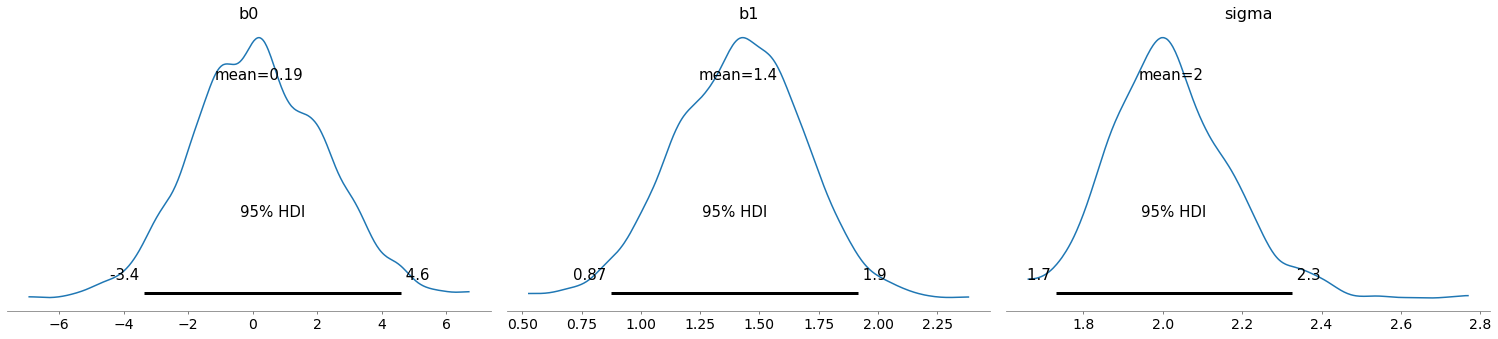

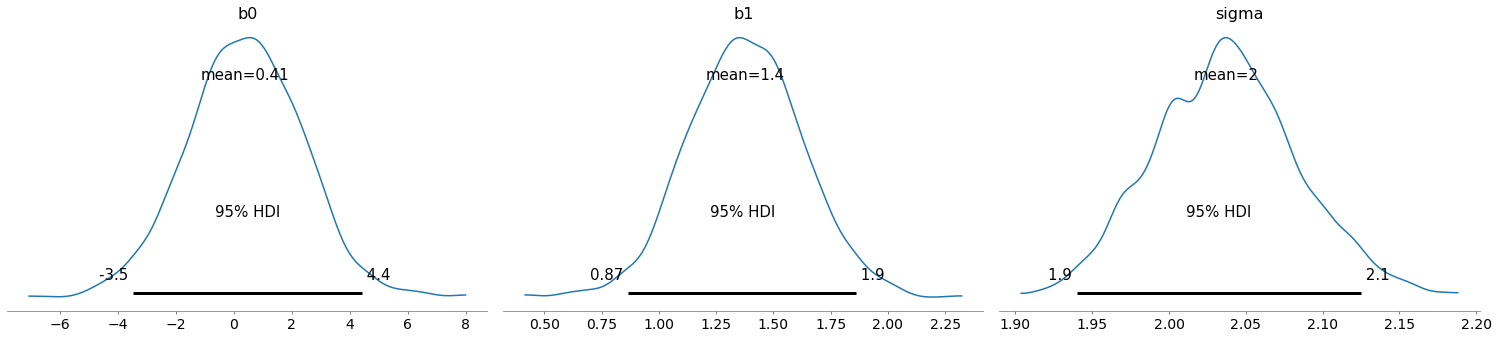

In [ ]:
n=[10,100,1000]
for i in n:
  a=5
  b=.8
  sigma=2
  h=np.random.normal(7,1,1)
  w=a+b*h
  data=np.random.normal(w,sigma,i)
  with pm.Model() as model1:
    b0=pm.Normal('b0',0,2)
    b1=pm.Normal('b1',0,2)
    sigma=pm.HalfNormal('sigma',10)
    predw=pm.Normal('predw',mu=b0+b1*h,sd=sigma,observed=data)
    trace1=pm.sample(1000,tune=2000)
    az.plot_posterior(trace1,hdi_prob=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 3000/3000 [00:02<00:00, 1415.75it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 3000/3000 [00:02<00:00, 1431.15it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 3000/3000 [00:02<00:00, 1410.24it/s]


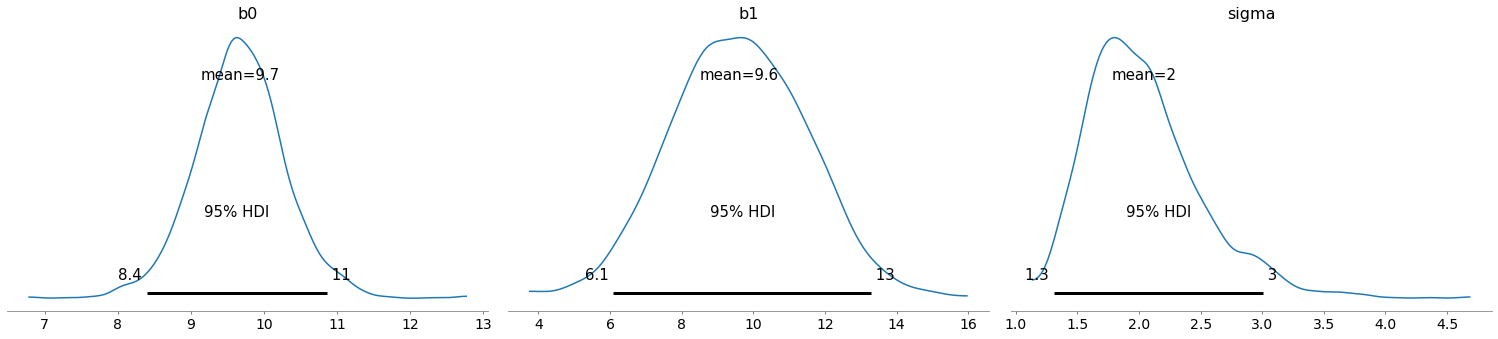

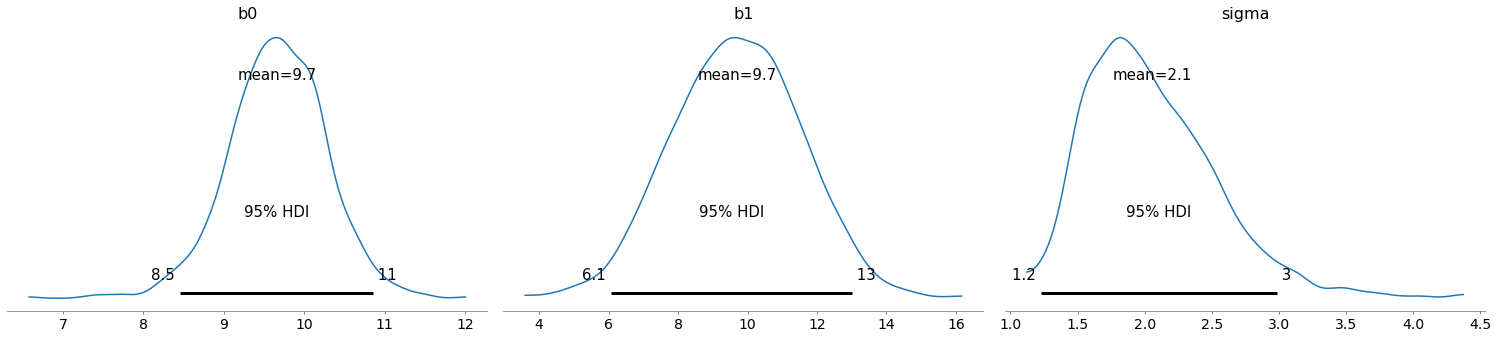

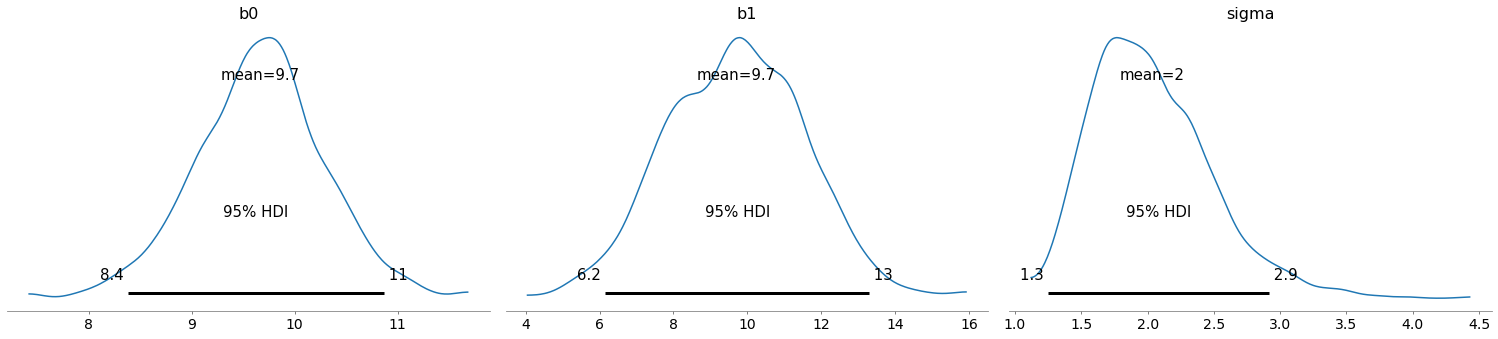

In [12]:
h=np.empty(1)
def generator1(x):
    a=5
    b=.8
    sigma=2
    h=np.random.normal(7,1,1)
    w=a+b*h
    data=np.random.normal(w,sigma,x)
    return(data)
d=generator1(10)
m=np.mean(d)
std=np.std(d)
n=[10,100,1000]
for i in n:
  with pm.Model() as model1:
    b0=pm.Normal('b0',m,std)
    b1=pm.Normal('b1',m,std)
    sigma=pm.HalfNormal('sigma',std)
    predw=pm.Normal('predw',mu=b0+b1*h,sd=sigma,observed=d)
    trace1=pm.sample(1000,tune=2000)
    az.plot_posterior(trace1,hdi_prob=.95)